# Pymaceuticals Inc.
---

### Analysis
Though it might be tempting to declare that Ramicane or Capomulin are the most effective treatment from the boxplot we made due to their low final volume values, this could be inaccurate. We should really measure net change in tumor volume over all timepoints for each mouse, and likely also include mouse weight, to get a more complete analysis on efficacy. The individual mouse treatment line chart is interesting; the tumor volume increases several times over the study, most notably at the end, and decreases most at the end. It would be interesting to see if the treatments have timepoint ranges at which they are each most effective. Given that the correlation value between weight and tumor volume is strongly significant (0.84), we can determine that tumor volume scales closely with weight of the mouse. Though I am not certain on the details of squamous cell carcinoma, it makes some sense that the tumors would be larger for larger mice. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single DataFrame and display the data table for preview
# all_data = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')
all_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(all_data['Mouse ID'].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# "duplicates" code found in Pandas documentation: 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
duplicates = all_data[all_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_ids = duplicates['Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicate_mice = all_data
# for loop keeps code relevant in case of >1 duplicate mouse IDs
for dupe in duplicate_ids:
    uniq_indices = no_duplicate_mice['Mouse ID'] != duplicate_ids[0]
    no_duplicate_mice = no_duplicate_mice[uniq_indices]
no_duplicate_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(no_duplicate_mice['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

# Aggregation code found in Pandas documentation:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html
aggregated_summary = no_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregated_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

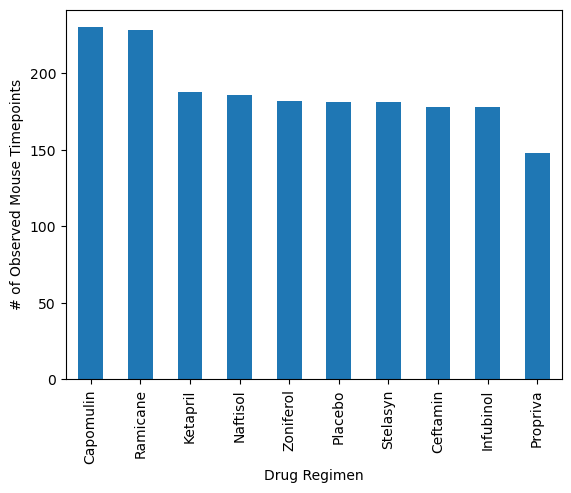

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = no_duplicate_mice.groupby('Drug Regimen')['Drug Regimen'].count()
sorted_counts = drug_counts.sort_values(ascending=False)
sorted_counts.plot(kind='bar')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.show()

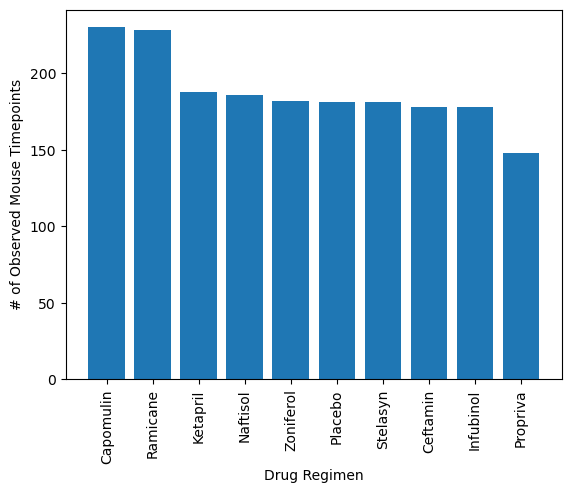

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(sorted_counts.keys(), sorted_counts)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.show()

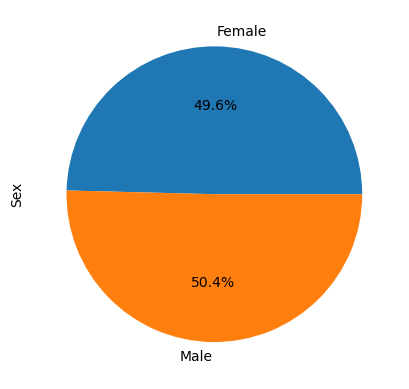

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Want to count mice, not studies; therefore drop duplicate IDs
# Drop duplicates code from Pandas documentation:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
one_row_per_id = no_duplicate_mice.drop_duplicates(subset=['Mouse ID'])
sex_counts = one_row_per_id.groupby('Sex')['Sex'].count()
sex_counts.plot(kind='pie', autopct='%1.1f%%') # autopct found in activity 05-09
plt.show()

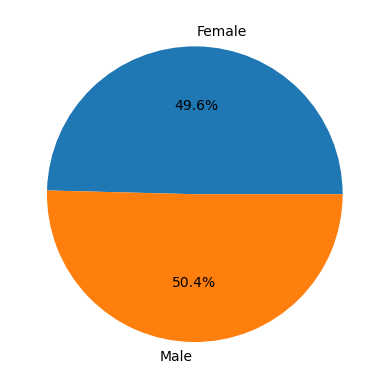

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts, labels=sex_counts.keys(), autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sort_both = no_duplicate_mice.sort_values(['Mouse ID', 'Timepoint']).groupby('Mouse ID')
last_timepoint_data = sort_both.last()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_vols = last_timepoint_data['Tumor Volume (mm3)']
last_tumor_vols.head()

Mouse ID
a203    67.973419
a251    65.525743
a262    70.717621
a275    62.999356
a366    63.440686
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Start by getting the last (greatest) timepoint for each mouse
study_sorted = study_results.sort_values(['Mouse ID', 'Timepoint']).groupby('Mouse ID')
last_timepoint_data = study_sorted.last()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
shared = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']
# Using left merge on last_timepoint_data gets only relevant additional info from cleaned DF
merged_data = last_timepoint_data.merge(no_duplicate_mice, how='left', on=shared)
merged_data = merged_data.dropna() # remove bad data already cleaned by no_duplicate_mice

print(len(no_duplicate_mice['Mouse ID'].unique()) == len(merged_data['Mouse ID'].unique())) # sanity check
merged_data.head()

True


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20.0,23.0
1,a251,45,65.525743,1,Infubinol,Female,21.0,25.0
2,a262,45,70.717621,4,Placebo,Female,17.0,29.0
3,a275,45,62.999356,3,Ceftamin,Female,20.0,28.0
4,a366,30,63.440686,1,Stelasyn,Female,16.0,29.0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# treatments = ['Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
volume_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    relevant_vols = merged_data[merged_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    # add subset 
    volume_data.append(relevant_vols)
    # Determine outliers using upper and lower bounds
    quartiles = relevant_vols.quantile([.25,.5,.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - (1.5 * iqr)
    upper_bound = quartiles[0.75] + (1.5 * iqr)
    outliers = relevant_vols[(relevant_vols > upper_bound) | (relevant_vols < lower_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


## Line and Scatter Plots

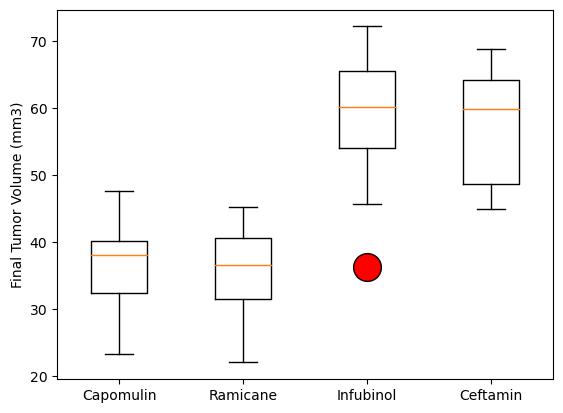

In [16]:
# "outlier_options" code found in Matplotlib documentation:
# https://matplotlib.org/3.1.1/gallery/statistics/boxplot.html
outlier_options = dict(marker='o', markerfacecolor='red', markersize=20)
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(volume_data, labels=treatments, flierprops=outlier_options)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

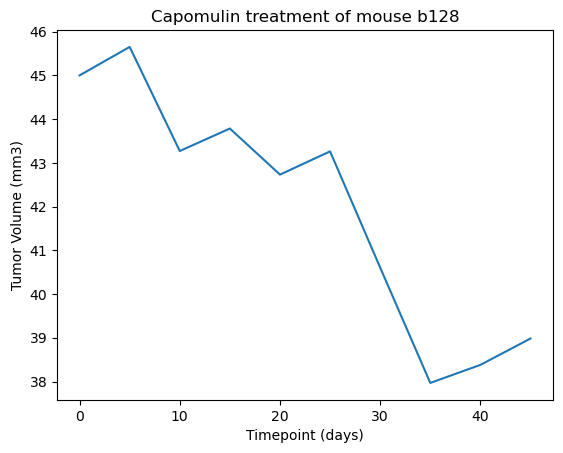

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
first_capomulin_id = no_duplicate_mice[no_duplicate_mice['Drug Regimen'] == 'Capomulin'].iloc[0,0]
relevant_mouse_data = no_duplicate_mice[no_duplicate_mice['Mouse ID'] == first_capomulin_id]
plt.plot(relevant_mouse_data['Timepoint'], relevant_mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Capomulin treatment of mouse {first_capomulin_id}")
plt.show()

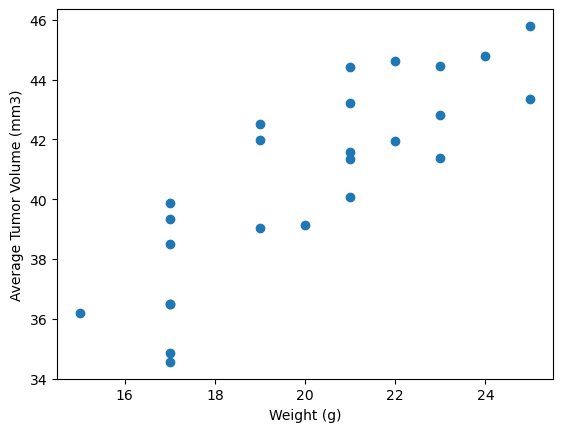

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_mice_data = no_duplicate_mice[no_duplicate_mice['Drug Regimen'] == 'Capomulin']
grouped_cap_data = cap_mice_data.groupby('Mouse ID') # we want info based on each individual mouse
# weight was not measured per timepoint, so any weight for each mouse is acceptable
weight_data = grouped_cap_data['Weight (g)'].first()
avg_tumor_data = grouped_cap_data['Tumor Volume (mm3)'].mean()
plt.scatter(weight_data, avg_tumor_data)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


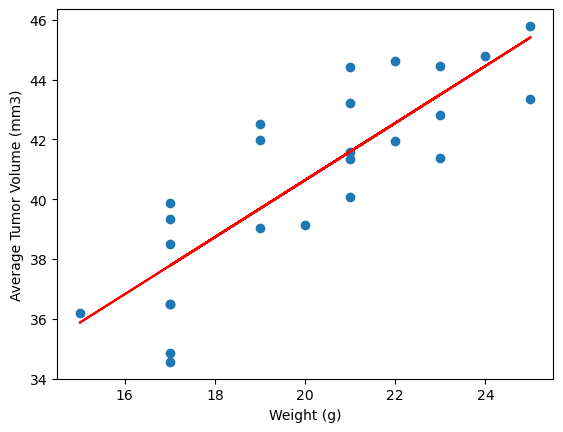

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight_data, avg_tumor_data)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_data, avg_tumor_data)
regression_data = weight_data * slope + intercept

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")
plt.scatter(weight_data, avg_tumor_data)
plt.plot(weight_data, regression_data, color='r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()